<a href="https://colab.research.google.com/github/archicos/8SlidingPuzzle/blob/main/main_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:

file_path = '/content/drive/MyDrive/Levelearn/dataset_levelearn_heart.csv'

# Mencoba membaca file dengan delimiter semicolon (;)
df = pd.read_csv(file_path, encoding="latin-1", sep=";")

# Menampilkan beberapa baris pertama untuk melihat struktur data
df.head()



,Timestamp,Email,Nama,NIM,Angkatan,Happiness_Q1,Happiness_Q2,Happiness_Q3,Happiness_Q4,Happiness_Q5,...,TaskSuccess_Q4,TaskSuccess_Q5,Qualitative_Q1,Qualitative_Q2,Qualitative_Q3,Qualitative_Q4,Feedback,Error,Suggestion,File
0,3/26/2025 11:44:39,gloriapanjaitan3012@gmail.com,Gloria Panjaitan,11S23030,2023,5,4,4,5,5,...,4,5,Leaderboard,Tidak,Tidak,Lebih seru dan menarik,Sudah di upload,Sudah di upload,Menambahkan animasi sederhana,https://drive.google.com/open?id=1UWwnVxfv8Sn8...
1,3/26/2025 11:45:03,andresaragih932@gmail.com,Andre Christian Saragih,11S23026,2023,5,5,5,5,5,...,5,5,Point\n\nKarena pointnya dapat ditukarkan dan ...,Tidak,Tidak,Gamifikasi meningkatkan kualitas belajar saya,Sangat bagus,Sudah di uppload,Sudah baik,https://drive.google.com/open?id=1yJpmGPuwsZ1A...
2,3/26/2025 11:45:24,firenoobgaming@gmail.com,Josua,11S23033,2023,3,3,5,4,3,...,3,3,Progress bar,Tidak,Tidak ada sejauh ini,Sama aja,Di foto,Banyak,Ada di foto,https://drive.google.com/open?id=1-51jAdyASsbI...
3,3/26/2025 11:46:16,josuaasrgh@gmail.com,Josua Saragih,11S23028,2023,5,5,4,4,4,...,3,4,Leaderboard,tidak,tidak ada,"lebih seru, dan jadi berpacu untuk belajar",aplikasi nya bagus untuk memacu mahasiswa untu...,1. tombol back tidak berfungsi dengan baik\n2....,UI nya lebih menarik lagi,NaN
4,3/26/2025 11:47:18,christopasaribu90@gmail.com,Christo Pasaribu,11S23005,2023,5,5,5,4,4,...,4,4,"Point, karena ingin menukar nya dengan hadiah",Tidak,Tidak,Sebelum ada fitur gamifikasi tidak ada niatan ...,NaN,Jumlah soal yang benar tidak sesuai dengan jum...,Menurut saya sudah pass mantapp\n,NaN


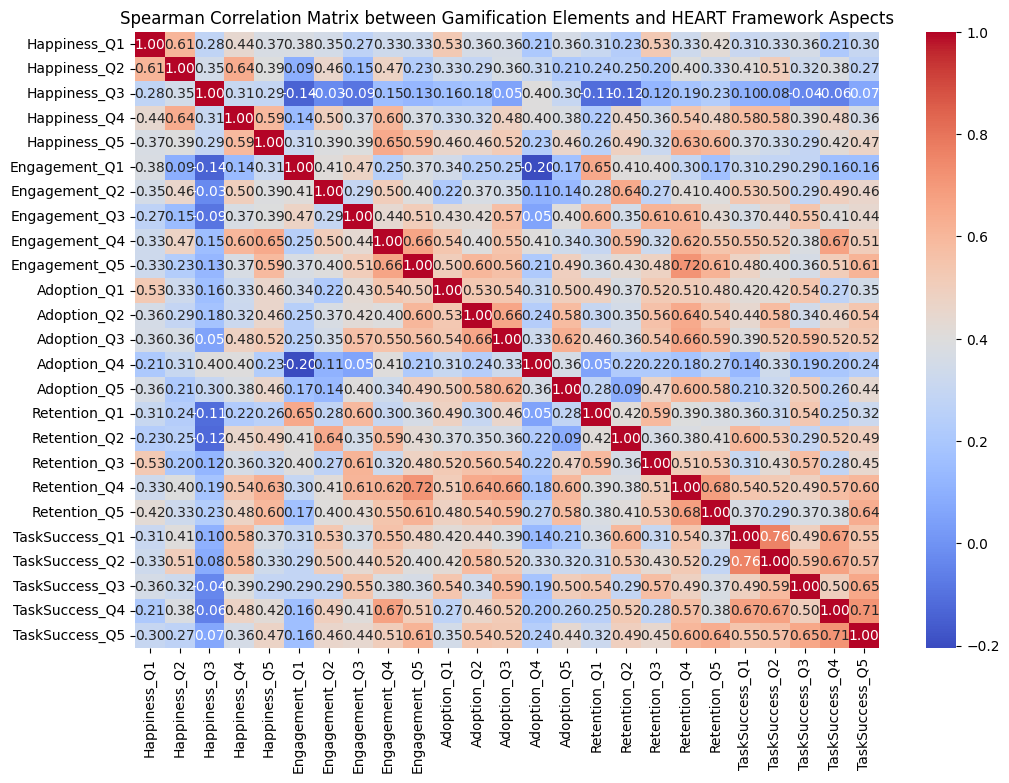

In [6]:
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# Menyiapkan kolom-kolom yang diperlukan untuk uji korelasi
# Elemen gamifikasi (Q1-Q5) dan aspek HEART (Happiness, Engagement, Adoption, Retention, Task Success)
gamification_columns = ['Happiness_Q1', 'Happiness_Q2', 'Happiness_Q3', 'Happiness_Q4', 'Happiness_Q5',
                        'Engagement_Q1', 'Engagement_Q2', 'Engagement_Q3', 'Engagement_Q4', 'Engagement_Q5',
                        'Adoption_Q1', 'Adoption_Q2', 'Adoption_Q3', 'Adoption_Q4', 'Adoption_Q5',
                        'Retention_Q1', 'Retention_Q2', 'Retention_Q3', 'Retention_Q4', 'Retention_Q5',
                        'TaskSuccess_Q1', 'TaskSuccess_Q2', 'TaskSuccess_Q3', 'TaskSuccess_Q4', 'TaskSuccess_Q5']

# Hanya mengambil kolom yang relevan untuk uji korelasi
df_korelasi = df[gamification_columns]

# Melakukan uji korelasi Spearman antara setiap elemen gamifikasi dan aspek HEART
corr_matrix, _ = spearmanr(df_korelasi, axis=0)

# Visualisasi hasil korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=gamification_columns, yticklabels=gamification_columns)
plt.title('Spearman Correlation Matrix between Gamification Elements and HEART Framework Aspects')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


In [7]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Menyusun variabel dependen (y) dan independen (X)
# Asumsi: kita ingin melihat pengaruh gamifikasi terhadap aspek TaskSuccess sebagai contoh (misalnya)
# Anda dapat memilih aspek lain sesuai keinginan untuk dianalisis lebih lanjut.

# Menggunakan TaskSuccess (Q1 - Q5) sebagai variabel dependen (y)
task_success_columns = ['TaskSuccess_Q1', 'TaskSuccess_Q2', 'TaskSuccess_Q3', 'TaskSuccess_Q4', 'TaskSuccess_Q5']
y = df[task_success_columns].mean(axis=1)  # Mengambil rata-rata TaskSuccess

# Menggunakan elemen gamifikasi sebagai variabel independen (X)
gamification_columns = ['Happiness_Q1', 'Happiness_Q2', 'Happiness_Q3', 'Happiness_Q4', 'Happiness_Q5',
                        'Engagement_Q1', 'Engagement_Q2', 'Engagement_Q3', 'Engagement_Q4', 'Engagement_Q5',
                        'Adoption_Q1', 'Adoption_Q2', 'Adoption_Q3', 'Adoption_Q4', 'Adoption_Q5',
                        'Retention_Q1', 'Retention_Q2', 'Retention_Q3', 'Retention_Q4', 'Retention_Q5',
                        'TaskSuccess_Q1', 'TaskSuccess_Q2', 'TaskSuccess_Q3', 'TaskSuccess_Q4', 'TaskSuccess_Q5']

# Mengambil data elemen gamifikasi
X = df[gamification_columns]

# Standarisasi data untuk regresi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menambahkan konstanta (intercept) untuk regresi
X_scaled = sm.add_constant(X_scaled)

# Melakukan regresi linear berganda
model = sm.OLS(y, X_scaled).fit()

# Menampilkan ringkasan hasil regresi
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.534e+29
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        08:30:31   Log-Likelihood:                 1762.6
No. Observations:                  54   AIC:                            -3473.
Df Residuals:                      28   BIC:                            -3422.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1074   3.05e-16   1.35e+16      0.000       4.107       4.107
x1          5.274e-16   6.28e-16      0.840      0.408   -7.58e-16    1.81e-15
x2         -8.327e-17   8.18e-16     -0.102      0.920   -1.76e-15    1.59e-15
x3         -5.551e-17   4.91e-16     -0.113      0.911   -1.06e-15    9.51e-16
x4         -5.759e-16   8.13e-16     -0.708      0.485   -2.24e-15    1.09e-15
x5          4.441e-16   6.93e-16      0.641      0.527   -9.75e-16    1.86e-15
x6         -1.055e-15   6.66e-16     -1.584      0.124   -2.42e-15    3.09e-16
x7          2.984e-16   5.41e-16      0.552      0.586    -8.1e-16    1.41e-15
x8          2.082e-17   5.19e-16      0.040      0.968   -1.04e-15    1.08e-15
x9          3.608e-16   7.69e-16      0.469      0.642   -1.21e-15    1.94e-15
x10         3.331e-16   6.48e-16      0.514      0.611   -9.95e-16    1.66e-15
x11        -4.441e-16   6.31e-16     -0.704      0.487   -1.74e-15    8.48e-16
x12        -3.608e-16   6.42e-16     -0.562      0.579   -1.68e-15    9.54e-16
x13         2.776e-16   6.11e-16      0.454      0.653   -9.74e-16    1.53e-15
x14        -2.771e-16   4.85e-16     -0.571      0.572   -1.27e-15    7.16e-16
x15          2.22e-16   5.05e-16      0.440      0.663   -8.12e-16    1.26e-15
x16          1.11e-15   7.04e-16      1.578      0.126   -3.31e-16    2.55e-15
x17         5.551e-17   6.88e-16      0.081      0.936   -1.35e-15    1.46e-15
x18         1.665e-16   7.39e-16      0.225      0.823   -1.35e-15    1.68e-15
x19         3.469e-16   6.84e-16      0.507      0.616   -1.05e-15    1.75e-15
x20        -4.441e-16   6.92e-16     -0.642      0.526   -1.86e-15    9.73e-16
x21            0.1360   7.14e-16   1.91e+14      0.000       0.136       0.136
x22            0.1515   7.67e-16   1.98e+14      0.000       0.151       0.151
x23            0.1384   8.68e-16   1.59e+14      0.000       0.138       0.138
x24            0.1474   7.47e-16   1.97e+14      0.000       0.147       0.147
x25            0.1483   9.15e-16   1.62e+14      0.000       0.148       0.148
==============================================================================
Omnibus:                        0.381   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.826   Jarque-Bera (JB):                0.298
Skew:                          -0.174   Prob(JB):                        0.862
Kurtosis:                       2.895   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Menggunakan TaskSuccess (Q1 - Q5) sebagai variabel dependen (y)
y = df[task_success_columns].mean(axis=1)  # Mengambil rata-rata TaskSuccess

# Menggunakan elemen gamifikasi sebagai variabel independen (X)
X = df[gamification_columns]

# Standarisasi data untuk regresi
X_scaled = scaler.fit_transform(X)

# Menambahkan konstanta (intercept) untuk regresi
X_scaled = sm.add_constant(X_scaled)

# Melakukan regresi linear berganda
model = sm.OLS(y, X_scaled).fit()

# Menampilkan ringkasan hasil regresi
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.534e+29
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        08:31:45   Log-Likelihood:                 1762.6
No. Observations:                  54   AIC:                            -3473.
Df Residuals:                      28   BIC:                            -3422.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1074   3.05e-16   1.35e+16      0.000       4.107       4.107
x1          5.274e-16   6.28e-16      0.840      0.408   -7.58e-16    1.81e-15
x2         -8.327e-17   8.18e-16     -0.102      0.920   -1.76e-15    1.59e-15
x3         -5.551e-17   4.91e-16     -0.113      0.911   -1.06e-15    9.51e-16
x4         -5.759e-16   8.13e-16     -0.708      0.485   -2.24e-15    1.09e-15
x5          4.441e-16   6.93e-16      0.641      0.527   -9.75e-16    1.86e-15
x6         -1.055e-15   6.66e-16     -1.584      0.124   -2.42e-15    3.09e-16
x7          2.984e-16   5.41e-16      0.552      0.586    -8.1e-16    1.41e-15
x8          2.082e-17   5.19e-16      0.040      0.968   -1.04e-15    1.08e-15
x9          3.608e-16   7.69e-16      0.469      0.642   -1.21e-15    1.94e-15
x10         3.331e-16   6.48e-16      0.514      0.611   -9.95e-16    1.66e-15
x11        -4.441e-16   6.31e-16     -0.704      0.487   -1.74e-15    8.48e-16
x12        -3.608e-16   6.42e-16     -0.562      0.579   -1.68e-15    9.54e-16
x13         2.776e-16   6.11e-16      0.454      0.653   -9.74e-16    1.53e-15
x14        -2.771e-16   4.85e-16     -0.571      0.572   -1.27e-15    7.16e-16
x15          2.22e-16   5.05e-16      0.440      0.663   -8.12e-16    1.26e-15
x16          1.11e-15   7.04e-16      1.578      0.126   -3.31e-16    2.55e-15
x17         5.551e-17   6.88e-16      0.081      0.936   -1.35e-15    1.46e-15
x18         1.665e-16   7.39e-16      0.225      0.823   -1.35e-15    1.68e-15
x19         3.469e-16   6.84e-16      0.507      0.616   -1.05e-15    1.75e-15
x20        -4.441e-16   6.92e-16     -0.642      0.526   -1.86e-15    9.73e-16
x21            0.1360   7.14e-16   1.91e+14      0.000       0.136       0.136
x22            0.1515   7.67e-16   1.98e+14      0.000       0.151       0.151
x23            0.1384   8.68e-16   1.59e+14      0.000       0.138       0.138
x24            0.1474   7.47e-16   1.97e+14      0.000       0.147       0.147
x25            0.1483   9.15e-16   1.62e+14      0.000       0.148       0.148
==============================================================================
Omnibus:                        0.381   Durbin-Watson:                   0.724
Prob(Omnibus):                  0.826   Jarque-Bera (JB):                0.298
Skew:                          -0.174   Prob(JB):                        0.862
Kurtosis:                       2.895   Cond. No.                         16.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Re-loading the dataset and performing the correlation analysis again after environment reset.
import pandas as pd
from scipy.stats import spearmanr

# Kolom-kolom yang berhubungan dengan elemen gamifikasi dan aspek HEART
gamification_elements = ['Happiness_Q1', 'Happiness_Q2', 'Happiness_Q3', 'Happiness_Q4', 'Happiness_Q5',
                         'Engagement_Q1', 'Engagement_Q2', 'Engagement_Q3', 'Engagement_Q4', 'Engagement_Q5',
                         'Adoption_Q1', 'Adoption_Q2', 'Adoption_Q3', 'Adoption_Q4', 'Adoption_Q5',
                         'Retention_Q1', 'Retention_Q2', 'Retention_Q3', 'Retention_Q4', 'Retention_Q5',
                         'TaskSuccess_Q1', 'TaskSuccess_Q2', 'TaskSuccess_Q3', 'TaskSuccess_Q4', 'TaskSuccess_Q5']

# Elemen gamifikasi (Leaderboard, Progress Bar, Points, Level, Badge)
gamification_labels = ['Leaderboard', 'Progress Bar', 'Points', 'Level', 'Badge']

# Membagi data menjadi kolom elemen gamifikasi (Q1-Q5) dan aspek HEART (Happiness, Engagement, Adoption, Retention, Task Success)
gamification_data = {
    'Leaderboard': [df['Happiness_Q1'], df['Engagement_Q1'], df['Adoption_Q1'], df['Retention_Q1'], df['TaskSuccess_Q1']],
    'Progress Bar': [df['Happiness_Q2'], df['Engagement_Q2'], df['Adoption_Q2'], df['Retention_Q2'], df['TaskSuccess_Q2']],
    'Points': [df['Happiness_Q3'], df['Engagement_Q3'], df['Adoption_Q3'], df['Retention_Q3'], df['TaskSuccess_Q3']],
    'Level': [df['Happiness_Q4'], df['Engagement_Q4'], df['Adoption_Q4'], df['Retention_Q4'], df['TaskSuccess_Q4']],
    'Badge': [df['Happiness_Q5'], df['Engagement_Q5'], df['Adoption_Q5'], df['Retention_Q5'], df['TaskSuccess_Q5']]
}

In [24]:
!pip install ace_tools

In [9]:
# Definisikan nama kolom untuk aspek HEART
heart_columns = ['Happiness_Q1', 'Happiness_Q2', 'Happiness_Q3', 'Happiness_Q4', 'Happiness_Q5',
                 'Engagement_Q1', 'Engagement_Q2', 'Engagement_Q3', 'Engagement_Q4', 'Engagement_Q5',
                 'Adoption_Q1', 'Adoption_Q2', 'Adoption_Q3', 'Adoption_Q4', 'Adoption_Q5',
                 'Retention_Q1', 'Retention_Q2', 'Retention_Q3', 'Retention_Q4', 'Retention_Q5',
                 'TaskSuccess_Q1', 'TaskSuccess_Q2', 'TaskSuccess_Q3', 'TaskSuccess_Q4', 'TaskSuccess_Q5']

# Kolom-kolom yang berhubungan dengan elemen gamifikasi dan aspek HEART
heart_columns = [
    ["Happiness_Q1", "Happiness_Q2", "Happiness_Q3", "Happiness_Q4", "Happiness_Q5"],
    ["Engagement_Q1", "Engagement_Q2", "Engagement_Q3", "Engagement_Q4", "Engagement_Q5"],
    ["Adoption_Q1", "Adoption_Q2", "Adoption_Q3", "Adoption_Q4", "Adoption_Q5"],
    ["Retention_Q1", "Retention_Q2", "Retention_Q3", "Retention_Q4", "Retention_Q5"],
    ["TaskSuccess_Q1", "TaskSuccess_Q2", "TaskSuccess_Q3", "TaskSuccess_Q4", "TaskSuccess_Q5"]
]

# Menghitung korelasi Spearman untuk semua elemen gamifikasi dan aspek HEART (Happiness, Engagement, Adoption, Retention, Task Success)
correlation_results = {}

for element, data in gamification_data.items():
    correlations = [spearmanr(data[i], df[heart_columns[i]])[0] for i in range(5)]
    correlation_results[element] = correlations

# Menyusun hasil korelasi dalam bentuk DataFrame
correlation_df = pd.DataFrame(correlation_results, index=["Happiness", "Engagement", "Adoption", "Retention", "Task Success"])

# Menampilkan hasil korelasi dalam bentuk tabel
display(correlation_df)

,Leaderboard,Progress Bar,Points,Level,Badge
Happiness,"[[0.9999999999999999, 0.9999999999999999, 0.60...","[[1.0, 0.6088930610671903, 1.0, 0.349691909987...","[[1.0, 0.2787529154107397, 0.3496919099878721,...","[[1.0, 0.4410199745251527, 0.6389353995753148,...","[[0.9999999999999999, 0.3707385379292925, 0.39..."
Engagement,"[[1.0, 1.0, 0.4097254003912603, 0.474469320479...","[[1.0, 0.4097254003912603, 1.0, 0.294278171239...","[[1.0, 0.474469320479211, 0.29427817123951217,...","[[1.0, 0.24503881235921315, 0.5037760892072789...","[[1.0, 0.3729801590206076, 0.4010995825028027,..."
Adoption,"[[0.9999999999999999, 0.9999999999999999, 0.53...","[[1.0, 0.5331335731712437, 1.0, 0.657680944885...","[[0.9999999999999999, 0.5386697489041048, 0.65...","[[1.0, 0.3080543867020035, 0.23647583458128524...","[[0.9999999999999999, 0.49994402586988007, 0.5..."
Retention,"[[1.0, 1.0, 0.41610142564079433, 0.59379947373...","[[1.0, 0.41610142564079433, 1.0, 0.36236917568...","[[1.0, 0.5937994737397085, 0.36236917568706695...","[[0.9999999999999999, 0.39426883401166857, 0.3...","[[1.0, 0.3784180033719117, 0.4079128845623767,..."
Task Success,"[[1.0, 1.0, 0.7624886361905959, 0.490405460624...","[[1.0, 0.7624886361905959, 1.0, 0.586152853005...","[[1.0, 0.49040546062426427, 0.5861528530059597...","[[1.0, 0.674982454348695, 0.6736214835450071, ...","[[1.0, 0.5466978420480754, 0.5709224274776618,..."
